<a href="https://colab.research.google.com/github/akhmalas11/Skripsiclustering/blob/main/Skripsi_fuzzy_c_means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy C- Means Algoritma

## Fuzzy percobaan

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Read the data from Excel
df_full = pd.read_excel("data_miskin.xlsx")

# Mengecualikan kolom non-numerik
# Step 2: Select relevant features for clustering
data_feature= ['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)',
            'Indeks Keparahan Kemiskinan (P2) (Persen)',
            'Indeks Pembangunan Manusia',
            'Persentase Penduduk Miskin (persen)','Sektor Informal']
df_full = df_full[data_feature]
seleksi_data = df_full.select_dtypes(include=[np.number])

In [ ]:
# Convert the DataFrame to a NumPy array for clustering
X= seleksi_data.to_numpy()
#scaler = MinMaxScaler()
#X= scaler.fit_transform(fuzzy_c)

k = 3 #jumlah nilai  kluster
MAX_ITER = 100 # jumlah iterasi maksimum
n = len(X) #jumlah data
m = 2.00 #fuzzy parameter



In [ ]:
# Initialize the membership matrix with random values
def initializeMembershipMatrix():
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

In [ ]:
membership_mat = initializeMembershipMatrix()
membership_mat

[[0.2449211989611396, 0.5458976370686728, 0.20918116397018766],
 [0.26188260040742417, 0.39729419548864453, 0.3408232041039313],
 [0.46680701523794693, 0.19815655865661588, 0.3350364261054372],
 [0.23522492610242085, 0.6518468607703247, 0.11292821312725447],
 [0.4870828839619384, 0.03178895743388388, 0.48112815860417774],
 [0.24236688803842954, 0.5029606204507021, 0.25467249151086835],
 [0.1817541000130238, 0.5868545982774972, 0.23139130170947905],
 [0.4652053781842844, 0.2946106313749536, 0.24018399044076208],
 [0.37057159292646147, 0.17005680344973664, 0.4593716036238019],
 [0.3122235596501886, 0.38890066154893776, 0.2988757788008737],
 [0.1737649718961221, 0.5403910765670499, 0.285843951536828],
 [0.6394935940076497, 0.05582466308776457, 0.3046817429045856],
 [0.3100808738780989, 0.3311146495130496, 0.3588044766088515],
 [0.45276087785519686, 0.23018633798390278, 0.3170527841609003],
 [0.4517196867872865, 0.4647618305204626, 0.08351848269225084],
 [0.48045632931307125, 0.22003071877

In [ ]:
# Calculate the cluster center
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(X[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [ ]:
calculateClusterCenter(membership_mat)

[[1.417805276668933,
  0.3230284208580963,
  75.39855684966047,
  9.565650498815486,
  34.93548009130572],
 [1.6062955166957598,
  0.37620195572663523,
  73.84816204276167,
  10.486768928530793,
  38.74640149870745],
 [1.494979412902882,
  0.33664371624436296,
  73.82661123413494,
  10.31891885429136,
  40.17681385635423]]

In [ ]:
# Update the membership values
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(X[i])
        distances = [np.linalg.norm(np.array(x) - np.array(cluster_centers[j])) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

In [ ]:
# Get clusters from the membership matrix
def getClusters(membership_mat):
    cluster_labels = []
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

In [ ]:
# Fuzzy C-Means Clustering
def fuzzyCMeansClustering():
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers

Cluster Centers:
[[0.9607328670009406, 0.2107950508946876, 79.87573489323913, 6.572616741460967, 20.793246049475275], [1.803066901910507, 0.40059084522159777, 71.60122067883067, 12.358720916281628, 51.71836885812996], [1.651155303014475, 0.40351438581862326, 73.20666014298202, 10.61906939883073, 37.364574900659484]]
Silhouette Score: 0.48907156089247883
Davies-Bouldin Index: 0.6377102919909182

Cluster Data:
[1 2 2 1 1 1 2 2 1 2 2 1 2 2 0 1 2 2 2 2 1 2 2 2 0 2 1 1 1 0 0 0 0 0 0]


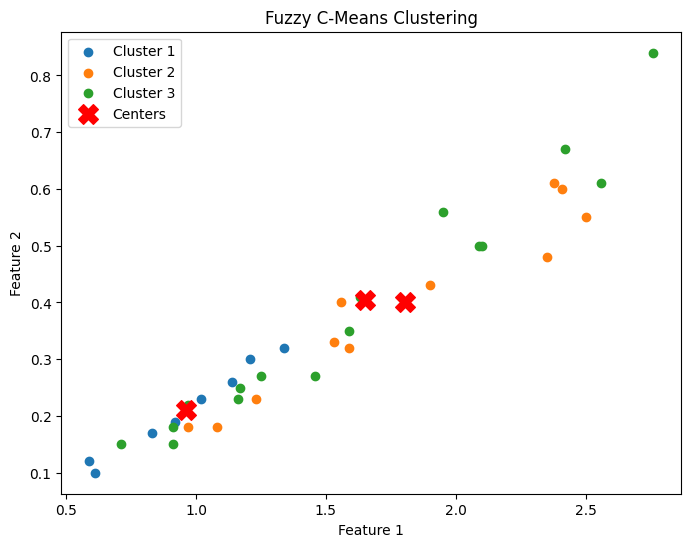

In [ ]:
# Main function
if __name__ == "__main__":
    labels, centers = fuzzyCMeansClustering()
    print("Cluster Centers:")
    print(centers)

    # Evaluating with Silhouette Score and Davies-Bouldin Index
    silhouette_avg = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")

    # Display cluster labels
    print("\nCluster Data:")
    print(np.array(labels))

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[np.array(labels) == i, 0], X[np.array(labels) == i, 1], label=f'Cluster {i+1}')
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], s=200, c='red', marker='X', label='Centers')
    plt.title('Fuzzy C-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [ ]:
X

array([[2.38000e+00, 6.10000e-01, 6.91600e+01, 1.47100e+01, 3.98344e+05,
        9.11400e+01, 5.79100e+01, 4.82100e+01, 3.55800e+01, 3.42400e+01,
        6.26000e+00],
       [2.09000e+00, 5.00000e-01, 7.39600e+01, 1.19500e+01, 5.00861e+05,
        9.16300e+01, 5.87500e+01, 3.78000e+01, 1.49100e+01, 2.01600e+01,
        6.35000e+00],
       [1.25000e+00, 2.70000e-01, 7.02000e+01, 8.73000e+00, 4.12196e+05,
        9.67000e+01, 5.93700e+01, 3.96700e+01, 2.77100e+01, 2.83200e+01,
        6.06000e+00],
       [1.59000e+00, 3.20000e-01, 7.06300e+01, 1.14200e+01, 4.64959e+05,
        9.45900e+01, 6.08900e+01, 6.05000e+01, 4.92700e+01, 2.42300e+01,
        3.10000e+00],
       [1.56000e+00, 4.00000e-01, 7.54100e+01, 9.63000e+00, 4.42071e+05,
        8.48500e+01, 5.62000e+01, 5.14100e+01, 4.28900e+01, 3.56500e+01,
        4.05000e+00],
       [2.50000e+00, 5.50000e-01, 6.97100e+01, 1.56000e+01, 5.42495e+05,
        8.42000e+01, 6.02800e+01, 4.74000e+01, 3.32500e+01, 2.99200e+01,
        8.9800

## Data Aslinya

Cluster Centers:
[[9.11002053e-01 1.94924685e-01 8.12114854e+01 6.24663090e+00
  6.33440391e+05 9.31181992e+01 5.68490683e+01 1.88259486e+01
  1.21869688e+00 1.14555133e+01 5.23807487e+00]
 [1.56974535e+00 3.70708047e-01 7.36412230e+01 1.02749291e+01
  5.11758894e+05 9.33552941e+01 6.00972909e+01 3.61179778e+01
  1.98692277e+01 2.14435663e+01 4.90585462e+00]
 [1.70950322e+00 3.91335554e-01 7.18920429e+01 1.17159809e+01
  4.41715410e+05 9.18256984e+01 6.11399156e+01 4.84427643e+01
  3.59356534e+01 2.71041488e+01 4.64164538e+00]]
Silhouette Score: 0.6202400272863365
Davies-Bouldin Index: 0.461241778893428

Cluster Data:
[2 1 2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 2 1 1 2 2 2 0 0 0 0 0 0]


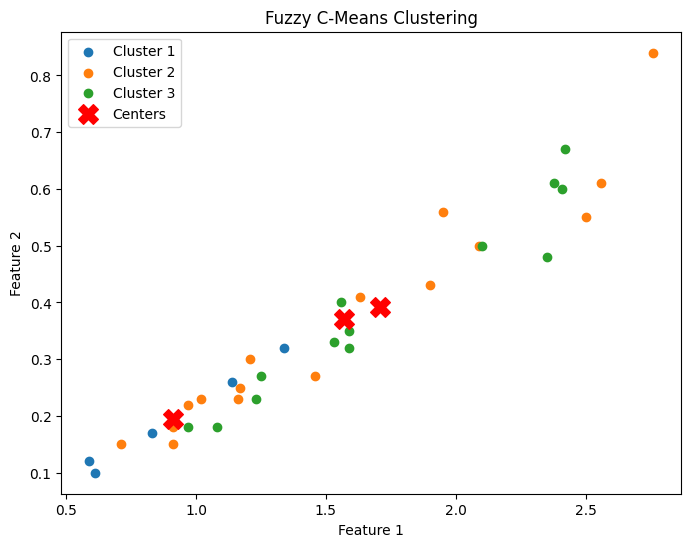

In [ ]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Read the data from Excel
df_full = pd.read_excel("data_miskin.xlsx")

# Exclude non-numeric columns
df = df_full.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array for clustering
X = df.to_numpy()

# Number of Clusters to make
k = 3

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(X)

# Fuzzy parameter
m = 2.00

# Initialize the membership matrix with random values
def initializeMembershipMatrix():
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return np.array(membership_mat)

# Calculate the cluster center
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(X[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return np.array(cluster_centers)

# Update the membership values
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(X[i])
        distances = [np.linalg.norm(np.array(x) - np.array(cluster_centers[j])) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

# Get clusters from the membership matrix
def getClusters(membership_mat):
    cluster_labels = []
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels
# Fuzzy C-Means Clustering
def fuzzyCMeansClustering():
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers

# Main function
if __name__ == "__main__":
    labels, centers = fuzzyCMeansClustering()
    print("Cluster Centers:")
    print(centers)

    # Evaluating with Silhouette Score and Davies-Bouldin Index
    silhouette_avg = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")

    # Display cluster labels
    print("\nCluster Data:")
    print(np.array(labels))

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[np.array(labels) == i, 0], X[np.array(labels) == i, 1], label=f'Cluster {i+1}')
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], s=200, c='red', marker='X', label='Centers')
    plt.title('Fuzzy C-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [ ]:
print("Data sudah dikonversi menjadi Numpy array")
X

Data sudah dikonversi menjadi Numpy array


array([[2.38000e+00, 6.10000e-01, 6.91600e+01, 1.47100e+01, 3.98344e+05,
        9.11400e+01, 5.79100e+01, 4.82100e+01, 3.55800e+01, 3.42400e+01,
        6.26000e+00],
       [2.09000e+00, 5.00000e-01, 7.39600e+01, 1.19500e+01, 5.00861e+05,
        9.16300e+01, 5.87500e+01, 3.78000e+01, 1.49100e+01, 2.01600e+01,
        6.35000e+00],
       [1.25000e+00, 2.70000e-01, 7.02000e+01, 8.73000e+00, 4.12196e+05,
        9.67000e+01, 5.93700e+01, 3.96700e+01, 2.77100e+01, 2.83200e+01,
        6.06000e+00],
       [1.59000e+00, 3.20000e-01, 7.06300e+01, 1.14200e+01, 4.64959e+05,
        9.45900e+01, 6.08900e+01, 6.05000e+01, 4.92700e+01, 2.42300e+01,
        3.10000e+00],
       [1.56000e+00, 4.00000e-01, 7.54100e+01, 9.63000e+00, 4.42071e+05,
        8.48500e+01, 5.62000e+01, 5.14100e+01, 4.28900e+01, 3.56500e+01,
        4.05000e+00],
       [2.50000e+00, 5.50000e-01, 6.97100e+01, 1.56000e+01, 5.42495e+05,
        8.42000e+01, 6.02800e+01, 4.74000e+01, 3.32500e+01, 2.99200e+01,
        8.9800

## Menggunakan Selection data

In [ ]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [ ]:
# Read the data from Excel
df_full = pd.read_excel("data_miskin.xlsx")

# Step 2: Select relevant features for clustering
data_feature=['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)',
            'Indeks Keparahan Kemiskinan (P2) (Persen)',
            'Indeks Pembangunan Manusia',
            'Persentase Penduduk Miskin (persen)','Sektor Informal']
df_full1 = df_full[data_feature]

Cluster Centers:
[[ 0.96073287  0.21079505 79.87573489  6.57261674 20.79324605]
 [ 1.8030669   0.40059085 71.60122068 12.35872092 51.71836886]
 [ 1.6511553   0.40351439 73.20666014 10.6190694  37.3645749 ]]
Silhouette Score: 0.48907156089247883
Davies-Bouldin Index: 0.6377102919909182

Cluster Data:
[1 2 2 1 1 1 2 2 1 2 2 1 2 2 0 1 2 2 2 2 1 2 2 2 0 2 1 1 1 0 0 0 0 0 0]


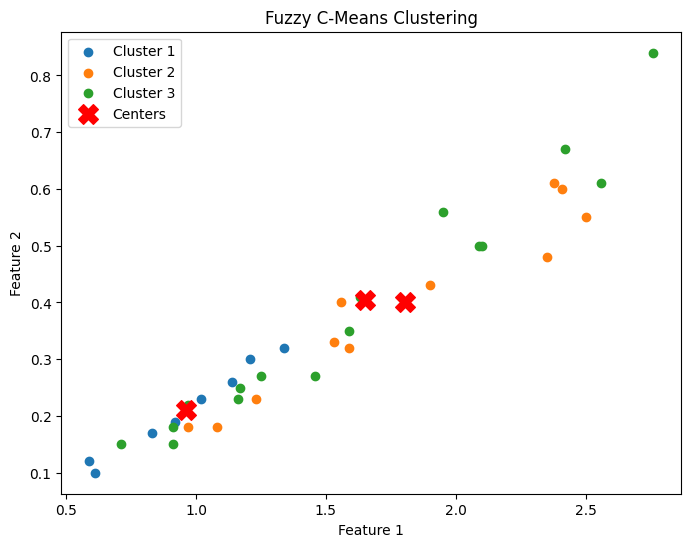

In [ ]:
# Exclude non-numeric columns
df = df_full1.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array for clustering
X = df.to_numpy()

# Number of Clusters to make
k = 3

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(X)

# Fuzzy parameter
m = 2.00

# Initialize the membership matrix with random values
def initializeMembershipMatrix():
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return np.array(membership_mat)

# Calculate the cluster center
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(X[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return np.array(cluster_centers)

# Update the membership values
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(X[i])
        distances = [np.linalg.norm(np.array(x) - np.array(cluster_centers[j])) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

# Get clusters from the membership matrix
def getClusters(membership_mat):
    cluster_labels = []
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels
# Fuzzy C-Means Clustering
def fuzzyCMeansClustering():
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers

# Main function
if __name__ == "__main__":
    labels, centers = fuzzyCMeansClustering()
    print("Cluster Centers:")
    print(centers)

    # Evaluating with Silhouette Score and Davies-Bouldin Index
    silhouette_avg = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")

    # Display cluster labels
    print("\nCluster Data:")
    print(np.array(labels))

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[np.array(labels) == i, 0], X[np.array(labels) == i, 1], label=f'Cluster {i+1}')
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], s=200, c='red', marker='X', label='Centers')
    plt.title('Fuzzy C-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [ ]:
print("Data sudah dikonversi menjadi Numpy array")
X

Data sudah dikonversi menjadi Numpy array


array([[ 2.38,  0.61, 69.16, 14.71, 48.21],
       [ 2.09,  0.5 , 73.96, 11.95, 37.8 ],
       [ 1.25,  0.27, 70.2 ,  8.73, 39.67],
       [ 1.59,  0.32, 70.63, 11.42, 60.5 ],
       [ 1.56,  0.4 , 75.41,  9.63, 51.41],
       [ 2.5 ,  0.55, 69.71, 15.6 , 47.4 ],
       [ 1.59,  0.35, 72.04, 10.68, 42.17],
       [ 1.95,  0.56, 74.07, 11.89, 38.58],
       [ 1.9 ,  0.43, 71.49, 11.43, 52.67],
       [ 0.71,  0.15, 73.85,  6.09, 29.6 ],
       [ 1.63,  0.41, 77.31,  9.59, 34.  ],
       [ 2.35,  0.48, 71.88, 15.71, 51.34],
       [ 0.91,  0.15, 73.86,  9.35, 41.37],
       [ 1.46,  0.27, 77.59, 12.04, 29.78],
       [ 1.02,  0.23, 76.71,  7.23, 24.02],
       [ 1.23,  0.23, 71.56, 10.83, 49.41],
       [ 1.17,  0.25, 73.59,  9.17, 34.27],
       [ 1.16,  0.23, 71.45,  8.95, 37.48],
       [ 2.56,  0.61, 68.08, 14.92, 41.57],
       [ 2.1 ,  0.5 , 70.51, 14.18, 40.32],
       [ 1.08,  0.18, 74.35, 10.87, 48.29],
       [ 2.76,  0.84, 71.89, 14.02, 34.97],
       [ 0.91,  0.18, 75.13,  6.

In [ ]:
#Menampilkan cluster labels
print("Cluster Data yang menggunakan selection")
print(np.array(labels))

Cluster Data yang menggunakan selection
[1 2 2 1 1 1 2 2 1 2 2 1 2 2 0 1 2 2 2 2 1 2 2 2 0 2 1 1 1 0 0 0 0 0 0]


In [ ]:
#Menampilkan Centroid data
print("Cluster Centers:")
print(centers)

Cluster Centers:
[[ 0.96073287  0.21079505 79.87573489  6.57261674 20.79324605]
 [ 1.8030669   0.40059085 71.60122068 12.35872092 51.71836886]
 [ 1.6511553   0.40351439 73.20666014 10.6190694  37.3645749 ]]


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluating with Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print(f"Hasil Evaluasi Fuzzy C-Means proses Selection data")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")

Hasil Evaluasi Fuzzy C-Means proses Selection data
Silhouette Score: 0.48907156089247883
Davies-Bouldin Index: 0.6377102919909182


In [ ]:
# Add a column for the cluster labels
df_full1['Cluster'] = labels

# Display or further process the clustered data
df_full1

<ipython-input-55-de5d6f31db8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full1['Cluster'] = labels


,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Sektor Informal,Cluster
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,48.21,1
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,37.80,2
2,Kabupaten Batang,1.25,0.27,70.20,8.73,39.67,2
3,Kabupaten Blora,1.59,0.32,70.63,11.42,60.50,1
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,51.41,1
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,47.40,1
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,42.17,2
7,Kabupaten Demak,1.95,0.56,74.07,11.89,38.58,2
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,52.67,1
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,29.60,2


In [ ]:
# Kelompokkan data berdasarkan nilai cluster
grouped_data = df_full1.groupby('Cluster')

# Iterasi melalui setiap kelompok dan tampilkan datanya
for cluster_label, cluster_df in grouped_data:
  print(f"\nCluster {cluster_label}:")
  print(cluster_df)


Cluster 0:
         Kabupaten/Kota  Indeks Kedalaman Kemiskinan (P1) (Persen)  \
14      Kabupaten Kudus                                       1.02   
24  Kabupaten Sukoharjo                                       1.21   
29        Kota Magelang                                       0.92   
30      Kota Pekalongan                                       0.83   
31        Kota Salatiga                                       0.61   
32        Kota Semarang                                       0.59   
33       Kota Surakarta                                       1.14   
34           Kota Tegal                                       1.34   

    Indeks Keparahan Kemiskinan (P2) (Persen)  Indeks Pembangunan Manusia  \
14                                       0.23                       76.71   
24                                       0.30                       78.65   
29                                       0.19                       81.17   
30                                       0.17    

## Data Menggunakan normalisasi

Cluster Centers:
[[0.32761906 0.23797837 0.29805701 0.49357566 0.28929902 0.6408046
  0.49865999 0.6178214  0.5844412  0.62214307 0.34311521]
 [0.73471809 0.5836431  0.18870082 0.81137559 0.28125724 0.40701681
  0.59413954 0.64221162 0.59832445 0.69687336 0.52115805]
 [0.18604025 0.16067168 0.66773287 0.23978313 0.70735257 0.63573878
  0.30063123 0.22735824 0.10250021 0.23491394 0.40833868]]
Silhouette Score: 0.2677335867629646
Davies-Bouldin Index: 1.2736449068565292

Cluster Data:
[1 1 0 0 0 1 1 1 0 2 0 1 0 0 2 0 0 0 1 1 0 1 0 1 2 0 0 0 1 2 2 2 2 2 2]


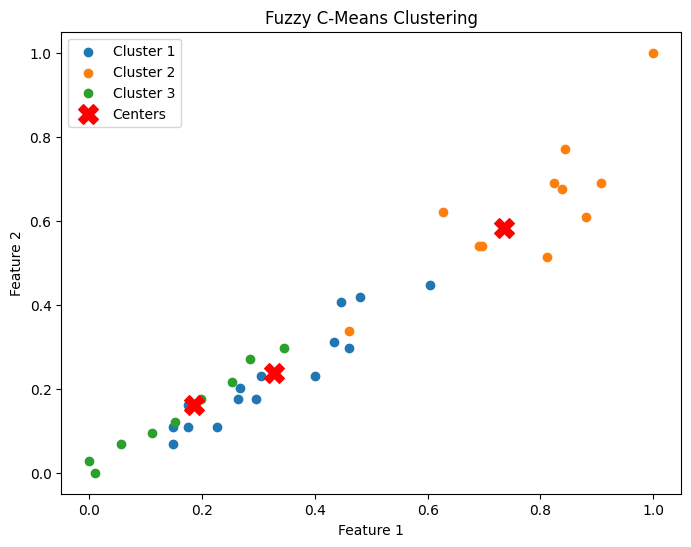

In [ ]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the data from Excel
df_fuzz = pd.read_excel("data_miskin.xlsx")

# Exclude non-numeric columns
df = df_fuzz.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array for clustering
data_fuzz = df.to_numpy()

scaler = MinMaxScaler()
X = scaler.fit_transform(data_fuzz)

# Number of Clusters to make
k = 3

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(X)

# Fuzzy parameter
m = 2.00

# Initialize the membership matrix with random values
def initializeMembershipMatrix():
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return np.array(membership_mat)

# Calculate the cluster center
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(X[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return np.array(cluster_centers)

# Update the membership values
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(X[i])
        distances = [np.linalg.norm(np.array(x) - np.array(cluster_centers[j])) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

# Get clusters from the membership matrix
def getClusters(membership_mat):
    cluster_labels = []
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels
# Fuzzy C-Means Clustering
def fuzzyCMeansClustering():
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers

# Main function
if __name__ == "__main__":
    labels, centers = fuzzyCMeansClustering()
    print("Cluster Centers:")
    print(centers)

    # Evaluating with Silhouette Score and Davies-Bouldin Index
    silhouette_avg = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")

    # Display cluster labels
    print("\nCluster Data:")
    print(np.array(labels))

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[np.array(labels) == i, 0], X[np.array(labels) == i, 1], label=f'Cluster {i+1}')
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], s=200, c='red', marker='X', label='Centers')
    plt.title('Fuzzy C-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [ ]:
print("Data sudah dikonversi menjadi Numpy array")
X

Data sudah dikonversi menjadi Numpy array


array([[0.82488479, 0.68918919, 0.06386753, 0.91438356, 0.        ,
        0.47324614, 0.3519656 , 0.71636228, 0.72214329, 0.95210598,
        0.61473088],
       [0.69124424, 0.54054054, 0.34772324, 0.67808219, 0.37470759,
        0.50237812, 0.40356265, 0.52236303, 0.30261823, 0.47384511,
        0.62747875],
       [0.30414747, 0.22972973, 0.1253696 , 0.40239726, 0.05063014,
        0.80380499, 0.44164619, 0.55721208, 0.5624112 , 0.75101902,
        0.58640227],
       [0.46082949, 0.2972973 , 0.15079834, 0.63270548, 0.243483  ,
        0.6783591 , 0.53501229, 0.94539694, 1.        , 0.61209239,
        0.16713881],
       [0.44700461, 0.40540541, 0.43347132, 0.47945205, 0.15982558,
        0.09928656, 0.24692875, 0.77599702, 0.87050944, 1.        ,
        0.30169972],
       [0.88018433, 0.60810811, 0.09639267, 0.99058219, 0.5268831 ,
        0.06064209, 0.497543  , 0.70126724, 0.67485285, 0.80536685,
        1.        ],
       [0.46082949, 0.33783784, 0.23418096, 0.56934932, 0.

In [ ]:
#Menampilkan cluster labels
print("Cluster Data yang menggunakan selection")
print(np.array(labels))

Cluster Data yang menggunakan selection
[1 1 0 0 0 1 1 1 0 2 0 1 0 0 2 0 0 0 1 1 0 1 0 1 2 0 0 0 1 2 2 2 2 2 2]


In [ ]:
#Menampilkan Centroid data
print("Cluster Centers:Data Normalisasi")
print(centers)

Cluster Centers:Data Normalisasi
[[0.32761906 0.23797837 0.29805701 0.49357566 0.28929902 0.6408046
  0.49865999 0.6178214  0.5844412  0.62214307 0.34311521]
 [0.73471809 0.5836431  0.18870082 0.81137559 0.28125724 0.40701681
  0.59413954 0.64221162 0.59832445 0.69687336 0.52115805]
 [0.18604025 0.16067168 0.66773287 0.23978313 0.70735257 0.63573878
  0.30063123 0.22735824 0.10250021 0.23491394 0.40833868]]


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluating with Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print(f"Hasil Evaluasi Fuzzy C-Means proses Normalisasi data")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")

Hasil Evaluasi Fuzzy C-Means proses Normalisasi data
Silhouette Score: 0.2677335867629646
Davies-Bouldin Index: 1.2736449068565292


In [ ]:
# Add a column for the cluster labels
df_fuzz['Cluster'] = labels

# Display or further process the clustered data
df_fuzz

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023,Cluster
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26,1
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35,1
2,Kabupaten Batang,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06,0
3,Kabupaten Blora,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10,0
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05,0
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,542495,84.20,60.28,47.40,33.25,29.92,8.98,1
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,441093,83.18,63.99,42.17,25.31,30.84,8.74,1
7,Kabupaten Demak,1.95,0.56,74.07,11.89,535134,96.22,63.60,38.58,18.79,11.01,5.38,1
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,489208,96.85,63.25,52.67,29.59,18.19,4.02,0
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,503832,91.97,58.50,29.60,14.14,18.83,3.35,2


In [ ]:
# Kelompokkan data berdasarkan nilai cluster
grouped_data = df_fuzz.groupby('Cluster')

# Iterasi melalui setiap kelompok dan tampilkan datanya
for cluster_label, cluster_df in grouped_data:
  print(f"\nCluster {cluster_label}:")
  print(cluster_df)


Cluster 0:
           Kabupaten/Kota  Indeks Kedalaman Kemiskinan (P1) (Persen)  \
2        Kabupaten Batang                                       1.25   
3         Kabupaten Blora                                       1.59   
4      Kabupaten Boyolali                                       1.56   
8      Kabupaten Grobogan                                       1.90   
10  Kabupaten Karanganyar                                       1.63   
12       Kabupaten Kendal                                       0.91   
13       Kabupaten Klaten                                       1.46   
15     Kabupaten Magelang                                       1.23   
16         Kabupaten Pati                                       1.17   
17   Kabupaten Pekalongan                                       1.16   
20    Kabupaten Purworejo                                       1.08   
22     Kabupaten Semarang                                       0.91   
25        Kabupaten Tegal                           

## Menggunakan Selection data dan Normalisasi

In [ ]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Read the data from Excel
df_ful = pd.read_excel("data_miskin.xlsx")

# Step 2: Select relevant features for clustering
data_features=['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)',
            'Indeks Keparahan Kemiskinan (P2) (Persen)',
            'Indeks Pembangunan Manusia',
            'Persentase Penduduk Miskin (persen)','Sektor Informal']
df_select = df_ful[data_features]

Cluster Centers:
[[0.30276873 0.2147228  0.2830292  0.47738711 0.61987665]
 [0.79752489 0.6390863  0.18212403 0.86046232 0.64563163]
 [0.17625852 0.15382565 0.66733925 0.23107143 0.22943302]]
Silhouette Score: 0.3942505081351853
Davies-Bouldin Index: 0.8624019673655173

Cluster Data:
[1 1 0 0 0 1 0 1 1 2 0 1 0 0 2 0 0 0 1 1 0 1 0 1 2 0 0 0 1 2 2 2 2 2 2]


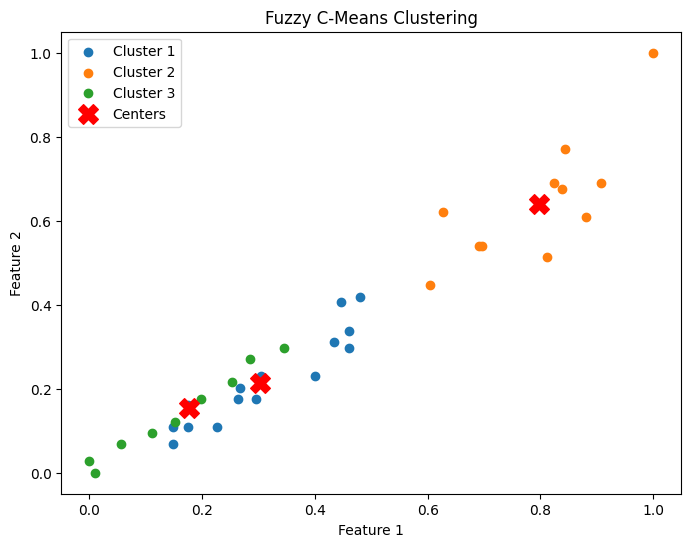

In [ ]:
# Exclude non-numeric columns
df = df_select.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array for clustering

data_fuz= df.to_numpy()
normalisasi = MinMaxScaler()
X = normalisasi.fit_transform(data_fuz)

# Number of Clusters to make
k = 3

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(X)

# Fuzzy parameter
m = 2.00

# Initialize the membership matrix with random values
def initializeMembershipMatrix():
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return np.array(membership_mat)

# Calculate the cluster center
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(X[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return np.array(cluster_centers)

# Update the membership values
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(X[i])
        distances = [np.linalg.norm(np.array(x) - np.array(cluster_centers[j])) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

# Get clusters from the membership matrix
def getClusters(membership_mat):
    cluster_labels = []
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels
# Fuzzy C-Means Clustering
def fuzzyCMeansClustering():
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers

# Main function
if __name__ == "__main__":
    labels, centers = fuzzyCMeansClustering()
    print("Cluster Centers:")
    print(centers)

    # Evaluating with Silhouette Score and Davies-Bouldin Index
    silhouette_avg = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")

    # Display cluster labels
    print("\nCluster Data:")
    print(np.array(labels))

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[np.array(labels) == i, 0], X[np.array(labels) == i, 1], label=f'Cluster {i+1}')
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], s=200, c='red', marker='X', label='Centers')
    plt.title('Fuzzy C-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [ ]:
print("Data sudah dikonversi menjadi Numpy array")
X

Data sudah dikonversi menjadi Numpy array


array([[0.82488479, 0.68918919, 0.06386753, 0.91438356, 0.71636228],
       [0.69124424, 0.54054054, 0.34772324, 0.67808219, 0.52236303],
       [0.30414747, 0.22972973, 0.1253696 , 0.40239726, 0.55721208],
       [0.46082949, 0.2972973 , 0.15079834, 0.63270548, 0.94539694],
       [0.44700461, 0.40540541, 0.43347132, 0.47945205, 0.77599702],
       [0.88018433, 0.60810811, 0.09639267, 0.99058219, 0.70126724],
       [0.46082949, 0.33783784, 0.23418096, 0.56934932, 0.60380171],
       [0.62672811, 0.62162162, 0.35422827, 0.67294521, 0.53689899],
       [0.60368664, 0.44594595, 0.20165582, 0.63356164, 0.7994782 ],
       [0.05529954, 0.06756757, 0.34121821, 0.17636986, 0.36954901],
       [0.47926267, 0.41891892, 0.54583087, 0.4760274 , 0.45154678],
       [0.81105991, 0.51351351, 0.2247191 , 1.        , 0.77469251],
       [0.14746544, 0.06756757, 0.34180958, 0.45547945, 0.58889303],
       [0.40092166, 0.22972973, 0.56238912, 0.68578767, 0.37290347],
       [0.19815668, 0.17567568, 0.

In [ ]:
# Menampilkan cluster labels
print("Cluster Data:")
print(np.array(labels))

Cluster Data:
[1 1 0 0 0 1 0 1 1 2 0 1 0 0 2 0 0 0 1 1 0 1 0 1 2 0 0 0 1 2 2 2 2 2 2]


In [ ]:
#Menampilkan Centroid data
print("Cluster Centers:Data Normalisasi dan Selection")
print(centers)

Cluster Centers:Data Normalisasi
[[0.30276873 0.2147228  0.2830292  0.47738711 0.61987665]
 [0.79752489 0.6390863  0.18212403 0.86046232 0.64563163]
 [0.17625852 0.15382565 0.66733925 0.23107143 0.22943302]]


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluating with Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print(f"Hasil Evaluasi Fuzzy C-Means")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")

Hasil Evaluasi Fuzzy C-Means
Silhouette Score: 0.3942505081351853
Davies-Bouldin Index: 0.8624019673655173


In [ ]:
# Add a column for the cluster labels
df_select['Cluster'] = labels

# Display or further process the clustered data
df_select

<ipython-input-11-8a10fba99788>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Cluster'] = labels


,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Sektor Informal,Cluster
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,48.21,1
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,37.80,1
2,Kabupaten Batang,1.25,0.27,70.20,8.73,39.67,0
3,Kabupaten Blora,1.59,0.32,70.63,11.42,60.50,0
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,51.41,0
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,47.40,1
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,42.17,0
7,Kabupaten Demak,1.95,0.56,74.07,11.89,38.58,1
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,52.67,1
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,29.60,2


In [ ]:
# Kelompokkan data berdasarkan nilai cluster
grouped_data = df_select.groupby('Cluster')

# Iterasi melalui setiap kelompok dan tampilkan datanya
for cluster_label, cluster_df in grouped_data:
  print(f"\nCluster {cluster_label}:")
  print(cluster_df)


Cluster 0:
           Kabupaten/Kota  Indeks Kedalaman Kemiskinan (P1) (Persen)  \
2        Kabupaten Batang                                       1.25   
3         Kabupaten Blora                                       1.59   
4      Kabupaten Boyolali                                       1.56   
6       Kabupaten Cilacap                                       1.59   
10  Kabupaten Karanganyar                                       1.63   
12       Kabupaten Kendal                                       0.91   
13       Kabupaten Klaten                                       1.46   
15     Kabupaten Magelang                                       1.23   
16         Kabupaten Pati                                       1.17   
17   Kabupaten Pekalongan                                       1.16   
20    Kabupaten Purworejo                                       1.08   
22     Kabupaten Semarang                                       0.91   
25        Kabupaten Tegal                           